<a href="https://colab.research.google.com/github/Rhuan-Messias/pytorch/blob/main/CNN_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Neural Network

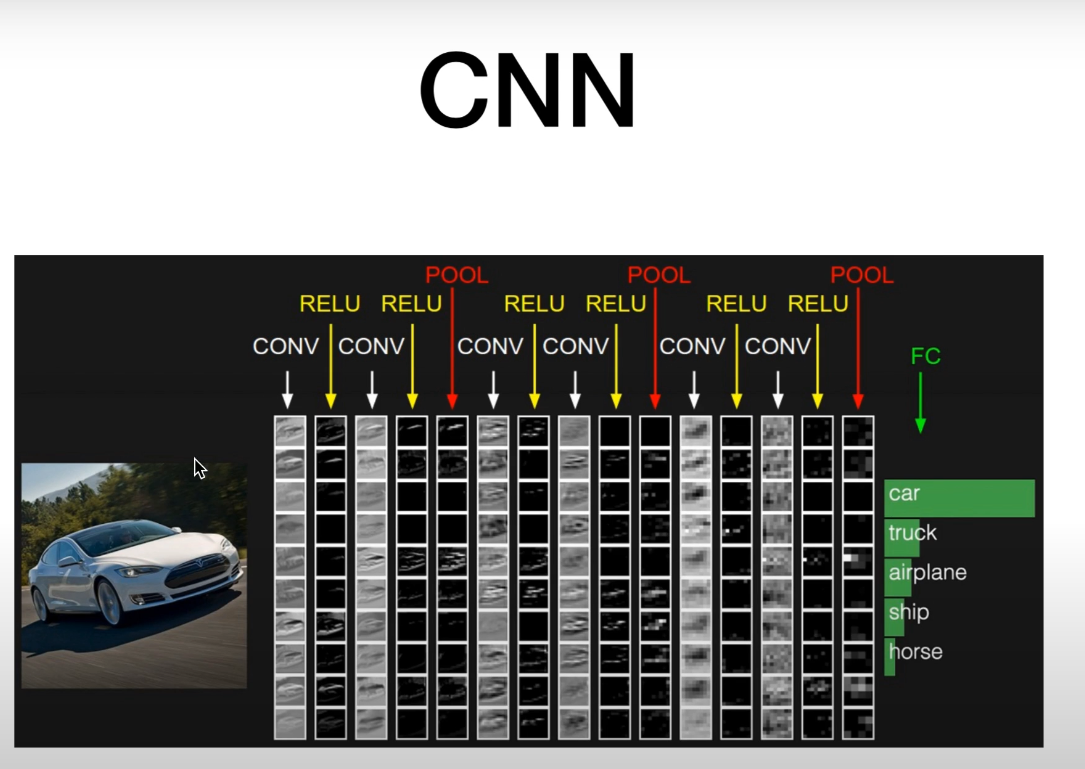

It is importante to get the correct size of the filter padding

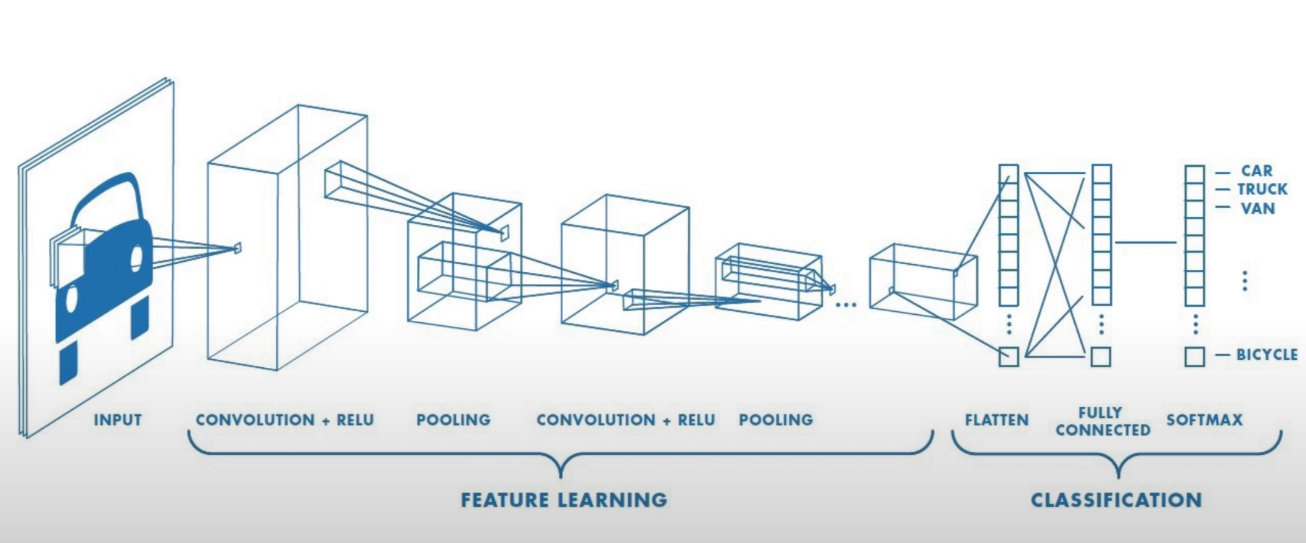

In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

#dataset has PILImage images of range [0,1].
#We transform them to Tensors of normalized range [-1,1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # input, output, kernel_size
    self.pool = nn.MaxPool2d(2,2) #kernel size, stride
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120) #output_size 120, you can change
    self.fc2 = nn.Linear(120,84) #input, output
    self.fc3 = nn.Linear(84,10) #output of 10 because of the ten classes

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5) #-1 makes pytorch find the correct size automatic
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss() #softmax is already included here
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    #origin shape: [4,3,32,32] = 4, 3, 1024
    #input_layer: 3 input channels, 6 outputchannels, 5 kernel size
    images = images.to(device)
    labels = labels.to(device)

    #forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1) % 2000 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Traing')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max retorna (valor, índice)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(labels.size(0)):  # usar labels.size(0), não batch_size fixo
            label = labels[i]
            pred = predicted[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    # Acurácia total
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc:.2f} %')

    # Acurácia por classe
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]} : {acc:.2f} %')

100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


Epoch [1/4], Step [2000/12500], Loss: 2.3581
Epoch [1/4], Step [4000/12500], Loss: 2.2979
Epoch [1/4], Step [6000/12500], Loss: 2.2817
Epoch [1/4], Step [8000/12500], Loss: 2.1958
Epoch [1/4], Step [10000/12500], Loss: 2.2235
Epoch [1/4], Step [12000/12500], Loss: 1.6124
Epoch [2/4], Step [2000/12500], Loss: 1.8906
Epoch [2/4], Step [4000/12500], Loss: 1.8595
Epoch [2/4], Step [6000/12500], Loss: 2.5198
Epoch [2/4], Step [8000/12500], Loss: 1.9535
Epoch [2/4], Step [10000/12500], Loss: 2.0250
Epoch [2/4], Step [12000/12500], Loss: 1.7522
Epoch [3/4], Step [2000/12500], Loss: 1.7650
Epoch [3/4], Step [4000/12500], Loss: 0.7324
Epoch [3/4], Step [6000/12500], Loss: 1.5075
Epoch [3/4], Step [8000/12500], Loss: 2.0343
Epoch [3/4], Step [10000/12500], Loss: 1.7719
Epoch [3/4], Step [12000/12500], Loss: 1.6918
Epoch [4/4], Step [2000/12500], Loss: 0.5897
Epoch [4/4], Step [4000/12500], Loss: 1.4664
Epoch [4/4], Step [6000/12500], Loss: 1.2754
Epoch [4/4], Step [8000/12500], Loss: 1.7944
Epoc

TypeError: 'int' object is not subscriptable